In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import keras
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,Input,Dense,Dropout,Flatten,Reshape,Embedding,GRU,LSTM,SimpleRNN
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

### Ex 1

In [66]:
input1 = np.array([[1,1],[0,1],[1,0],[0,0]])

#### Toutology

In [55]:
weights = np.array([[0],[0]])
bias = np.array([1])
output = input1@weights + bias
print(output)

[[1]
 [1]
 [1]
 [1]]


#### Not Gate

In [56]:
inputnot = np.array([[1],[0]])
def not1(x):
    weights = np.array([-1])
    bias = np.array([1])
    return x@weights + bias
print(not1(inputnot))

[0 1]


#### Or Gate

In [57]:
def step (s):
    return 1 if(s>0) else 0

In [58]:
def or1(x):
    weights = np.array([[1],[1]])
    bias = np.array([0])
    return x@weights + bias
print([step(i) for i in or1(input1)])


[1, 1, 1, 0]


#### And Gate

In [59]:
def and1(x):
    weights = np.array([[1],[1]])
    bias = np.array([-1])
    return x@weights+bias
print([step(i) for i in and1(input1)])

[1, 0, 0, 0]


#### Nor Gate

In [60]:
out = [step(i) for i in or1(input1)]
print(not1([[i] for i in out]))

[0 0 0 1]


#### Nand Gate

In [61]:
out = [step(i) for i in and1(input1)]
print(not1([[i] for i in out]))

[0 1 1 1]


#### XOR





In [67]:
step = np.vectorize(step)

In [69]:
w1 = np.array([[1,-1],[-1,1]])
w2 = np.array([[1],[1]])
out = step(step(input1@w1)@w2)
print(out)

[[0]
 [1]
 [1]
 [0]]


#### XNOR

In [71]:
w1 = np.array([[1,-1],[1,-1]])
w2 = np.array([[1],[1]])
bias = np.array([-1,1])
out = step(step(input1@w1 + bias)@w2)
print(out)

[[1]
 [0]
 [0]
 [1]]


## Linear Regression - Tensorflow

In [81]:
lr = 0.01
epochs=1000
np.random.seed(23)

x = np.random.random_sample(500).reshape(-1,1)
y = x*2 + 0.5*np.random.random(500).reshape(-1,1)

#### Training

In [82]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1))
opt = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=opt,loss='mean_absolute_error')
model.fit(x,y,epochs=epochs,batch_size=64,verbose=False)
y_pred = model.predict(x,verbose=False)

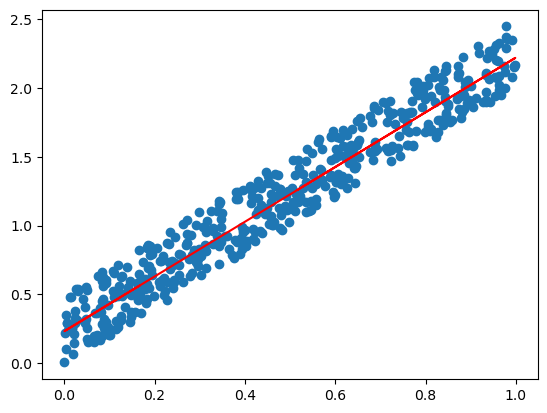

In [83]:
plt.scatter(x,y)
plt.plot(x,y_pred,c='red')

## Ablation Studies

### BOSTON   

In [88]:
(x_train,y_train),(x_test,y_test) = keras.datasets.boston_housing.load_data()

In [89]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(404, 13) (102, 13) (404,) (102,)


###### NORMALIZING

In [90]:
mean = x_train.mean()
x_train = x_train-mean
std = x_train.std()
x_train = x_train/std

In [91]:
x_test = x_test - mean
x_test = x_test/std

###### MODEL - Training

In [92]:
model1 = Sequential()
model1.add(Dense(256,activation='relu',input_shape=(x_train.shape[1],)))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(1))

opt = keras.optimizers.SGD(learning_rate=0.001)

model1.compile (optimizer=opt,loss='MSE')
hist1 = model1.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

Epoch 1/1000
13/13 [==============================] - 1s 17ms/step - loss: 342.5477 - val_loss: 123.6979
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 97.8486 - val_loss: 95.0899
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 83.2447 - val_loss: 77.6845
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 72.2228 - val_loss: 69.0100
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 71.7563 - val_loss: 69.7155
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 69.7097 - val_loss: 70.7962
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 66.5063 - val_loss: 62.1471
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 65.7462 - val_loss: 61.9634
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 64.4854 - val_loss: 64.8519
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 66.4

13/13 [==============================] - 0s 6ms/step - loss: 57.8962 - val_loss: 52.3482
Epoch 81/1000
13/13 [==============================] - 0s 7ms/step - loss: 56.3927 - val_loss: 59.3116
Epoch 82/1000
13/13 [==============================] - 0s 6ms/step - loss: 54.5871 - val_loss: 60.3091
Epoch 83/1000
13/13 [==============================] - 0s 6ms/step - loss: 55.1797 - val_loss: 53.0330
Epoch 84/1000
13/13 [==============================] - 0s 8ms/step - loss: 59.9719 - val_loss: 63.3332
Epoch 85/1000
13/13 [==============================] - 0s 5ms/step - loss: 56.9702 - val_loss: 56.1084
Epoch 86/1000
13/13 [==============================] - 0s 5ms/step - loss: 54.5758 - val_loss: 55.5625
Epoch 87/1000
13/13 [==============================] - 0s 5ms/step - loss: 51.8995 - val_loss: 55.6039
Epoch 88/1000
13/13 [==============================] - 0s 5ms/step - loss: 53.2720 - val_loss: 55.6172
Epoch 89/1000
13/13 [==============================] - 0s 5ms/step - loss: 56.8603 - va

13/13 [==============================] - 0s 7ms/step - loss: 49.4357 - val_loss: 58.6981
Epoch 160/1000
13/13 [==============================] - 0s 5ms/step - loss: 48.8775 - val_loss: 48.0652
Epoch 161/1000
13/13 [==============================] - 0s 6ms/step - loss: 48.4443 - val_loss: 54.6317
Epoch 162/1000
13/13 [==============================] - 0s 8ms/step - loss: 49.0850 - val_loss: 69.1826
Epoch 163/1000
13/13 [==============================] - 0s 8ms/step - loss: 48.5422 - val_loss: 58.4557
Epoch 164/1000
13/13 [==============================] - 0s 5ms/step - loss: 53.3161 - val_loss: 55.2624
Epoch 165/1000
13/13 [==============================] - 0s 5ms/step - loss: 48.5401 - val_loss: 71.2924
Epoch 166/1000
13/13 [==============================] - 0s 5ms/step - loss: 48.4593 - val_loss: 56.6973
Epoch 167/1000
13/13 [==============================] - 0s 5ms/step - loss: 54.3826 - val_loss: 54.5111
Epoch 168/1000
13/13 [==============================] - 0s 5ms/step - loss: 50.

Epoch 238/1000
13/13 [==============================] - 0s 5ms/step - loss: 49.8148 - val_loss: 55.7358
Epoch 239/1000
13/13 [==============================] - 0s 5ms/step - loss: 46.4314 - val_loss: 44.0276
Epoch 240/1000
13/13 [==============================] - 0s 5ms/step - loss: 44.5027 - val_loss: 47.9796
Epoch 241/1000
13/13 [==============================] - 0s 5ms/step - loss: 47.4918 - val_loss: 44.0862
Epoch 242/1000
13/13 [==============================] - 0s 5ms/step - loss: 53.7068 - val_loss: 53.0882
Epoch 243/1000
13/13 [==============================] - 0s 5ms/step - loss: 45.3941 - val_loss: 44.5396
Epoch 244/1000
13/13 [==============================] - 0s 5ms/step - loss: 40.5369 - val_loss: 42.5870
Epoch 245/1000
13/13 [==============================] - 0s 5ms/step - loss: 42.0364 - val_loss: 50.5945
Epoch 246/1000
13/13 [==============================] - 0s 5ms/step - loss: 48.2288 - val_loss: 44.1219
Epoch 247/1000
13/13 [==============================] - 0s 4ms/s

13/13 [==============================] - 0s 5ms/step - loss: 47.0301 - val_loss: 80.2222
Epoch 317/1000
13/13 [==============================] - 0s 5ms/step - loss: 51.8241 - val_loss: 42.5248
Epoch 318/1000
13/13 [==============================] - 0s 5ms/step - loss: 46.3985 - val_loss: 62.2770
Epoch 319/1000
13/13 [==============================] - 0s 5ms/step - loss: 42.3059 - val_loss: 40.0580
Epoch 320/1000
13/13 [==============================] - 0s 5ms/step - loss: 53.7192 - val_loss: 41.0544
Epoch 321/1000
13/13 [==============================] - 0s 5ms/step - loss: 46.3328 - val_loss: 46.6545
Epoch 322/1000
13/13 [==============================] - 0s 5ms/step - loss: 41.6910 - val_loss: 40.3515
Epoch 323/1000
13/13 [==============================] - 0s 5ms/step - loss: 51.8984 - val_loss: 42.0745
Epoch 324/1000
13/13 [==============================] - 0s 5ms/step - loss: 38.6726 - val_loss: 59.3079
Epoch 325/1000
13/13 [==============================] - 0s 5ms/step - loss: 49.

Epoch 395/1000
13/13 [==============================] - 0s 5ms/step - loss: 52.3374 - val_loss: 50.9168
Epoch 396/1000
13/13 [==============================] - 0s 5ms/step - loss: 58.2112 - val_loss: 44.3303
Epoch 397/1000
13/13 [==============================] - 0s 5ms/step - loss: 41.7693 - val_loss: 55.6844
Epoch 398/1000
13/13 [==============================] - 0s 5ms/step - loss: 50.7517 - val_loss: 57.5278
Epoch 399/1000
13/13 [==============================] - 0s 5ms/step - loss: 45.5008 - val_loss: 43.1666
Epoch 400/1000
13/13 [==============================] - 0s 5ms/step - loss: 38.1261 - val_loss: 45.7325
Epoch 401/1000
13/13 [==============================] - 0s 5ms/step - loss: 46.2547 - val_loss: 64.6496
Epoch 402/1000
13/13 [==============================] - 0s 5ms/step - loss: 47.2014 - val_loss: 56.1430
Epoch 403/1000
13/13 [==============================] - 0s 5ms/step - loss: 41.2615 - val_loss: 41.5963
Epoch 404/1000
13/13 [==============================] - 0s 5ms/s

Epoch 474/1000
13/13 [==============================] - 0s 4ms/step - loss: 39.5339 - val_loss: 49.1427
Epoch 475/1000
13/13 [==============================] - 0s 5ms/step - loss: 42.1866 - val_loss: 38.9778
Epoch 476/1000
13/13 [==============================] - 0s 5ms/step - loss: 45.8965 - val_loss: 38.0122
Epoch 477/1000
13/13 [==============================] - 0s 4ms/step - loss: 49.4714 - val_loss: 38.7632
Epoch 478/1000
13/13 [==============================] - 0s 5ms/step - loss: 33.4747 - val_loss: 47.2668
Epoch 479/1000
13/13 [==============================] - 0s 5ms/step - loss: 36.7973 - val_loss: 37.8875
Epoch 480/1000
13/13 [==============================] - 0s 4ms/step - loss: 37.0346 - val_loss: 52.0035
Epoch 481/1000
13/13 [==============================] - 0s 5ms/step - loss: 43.5343 - val_loss: 51.1935
Epoch 482/1000
13/13 [==============================] - 0s 5ms/step - loss: 36.4905 - val_loss: 41.9191
Epoch 483/1000
13/13 [==============================] - 0s 4ms/s

Epoch 553/1000
13/13 [==============================] - 0s 6ms/step - loss: 31.0019 - val_loss: 34.7287
Epoch 554/1000
13/13 [==============================] - 0s 6ms/step - loss: 36.9340 - val_loss: 38.1890
Epoch 555/1000
13/13 [==============================] - 0s 6ms/step - loss: 51.4367 - val_loss: 77.4225
Epoch 556/1000
13/13 [==============================] - 0s 6ms/step - loss: 35.4757 - val_loss: 38.3278
Epoch 557/1000
13/13 [==============================] - 0s 6ms/step - loss: 41.0770 - val_loss: 42.8035
Epoch 558/1000
13/13 [==============================] - 0s 6ms/step - loss: 36.9706 - val_loss: 46.7914
Epoch 559/1000
13/13 [==============================] - 0s 6ms/step - loss: 42.9480 - val_loss: 45.0344
Epoch 560/1000
13/13 [==============================] - 0s 6ms/step - loss: 32.2498 - val_loss: 36.2343
Epoch 561/1000
13/13 [==============================] - 0s 6ms/step - loss: 38.9725 - val_loss: 35.8892
Epoch 562/1000
13/13 [==============================] - 0s 6ms/s

Epoch 632/1000
13/13 [==============================] - 0s 6ms/step - loss: 40.4768 - val_loss: 36.4238
Epoch 633/1000
13/13 [==============================] - 0s 6ms/step - loss: 32.5967 - val_loss: 38.9258
Epoch 634/1000
13/13 [==============================] - 0s 6ms/step - loss: 43.5548 - val_loss: 47.6431
Epoch 635/1000
13/13 [==============================] - 0s 6ms/step - loss: 38.4791 - val_loss: 39.2564
Epoch 636/1000
13/13 [==============================] - 0s 6ms/step - loss: 40.4697 - val_loss: 51.1361
Epoch 637/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.2041 - val_loss: 34.1317
Epoch 638/1000
13/13 [==============================] - 0s 6ms/step - loss: 32.4169 - val_loss: 43.6611
Epoch 639/1000
13/13 [==============================] - 0s 6ms/step - loss: 35.9536 - val_loss: 50.8693
Epoch 640/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.8799 - val_loss: 34.3673
Epoch 641/1000
13/13 [==============================] - 0s 6ms/s

Epoch 711/1000
13/13 [==============================] - 0s 5ms/step - loss: 34.7407 - val_loss: 39.6815
Epoch 712/1000
13/13 [==============================] - 0s 5ms/step - loss: 49.4831 - val_loss: 37.5430
Epoch 713/1000
13/13 [==============================] - 0s 5ms/step - loss: 31.2185 - val_loss: 36.6179
Epoch 714/1000
13/13 [==============================] - 0s 5ms/step - loss: 32.1655 - val_loss: 39.3813
Epoch 715/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.7188 - val_loss: 36.1054
Epoch 716/1000
13/13 [==============================] - 0s 5ms/step - loss: 36.5187 - val_loss: 34.6142
Epoch 717/1000
13/13 [==============================] - 0s 5ms/step - loss: 42.9265 - val_loss: 37.5209
Epoch 718/1000
13/13 [==============================] - 0s 5ms/step - loss: 41.1828 - val_loss: 43.0035
Epoch 719/1000
13/13 [==============================] - 0s 5ms/step - loss: 41.9318 - val_loss: 58.6141
Epoch 720/1000
13/13 [==============================] - 0s 5ms/s

13/13 [==============================] - 0s 5ms/step - loss: 48.0482 - val_loss: 41.5001
Epoch 790/1000
13/13 [==============================] - 0s 6ms/step - loss: 37.4757 - val_loss: 73.7864
Epoch 791/1000
13/13 [==============================] - 0s 5ms/step - loss: 40.6133 - val_loss: 90.5245
Epoch 792/1000
13/13 [==============================] - 0s 5ms/step - loss: 39.8670 - val_loss: 34.8674
Epoch 793/1000
13/13 [==============================] - 0s 5ms/step - loss: 31.3014 - val_loss: 40.4738
Epoch 794/1000
13/13 [==============================] - 0s 5ms/step - loss: 33.7213 - val_loss: 152.1839
Epoch 795/1000
13/13 [==============================] - 0s 5ms/step - loss: 47.4335 - val_loss: 35.1394
Epoch 796/1000
13/13 [==============================] - 0s 5ms/step - loss: 35.4341 - val_loss: 83.9226
Epoch 797/1000
13/13 [==============================] - 0s 5ms/step - loss: 39.4499 - val_loss: 35.0084
Epoch 798/1000
13/13 [==============================] - 0s 5ms/step - loss: 33

Epoch 868/1000
13/13 [==============================] - 0s 5ms/step - loss: 32.8086 - val_loss: 37.6408
Epoch 869/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.4678 - val_loss: 36.2653
Epoch 870/1000
13/13 [==============================] - 0s 5ms/step - loss: 34.3651 - val_loss: 34.7768
Epoch 871/1000
13/13 [==============================] - 0s 5ms/step - loss: 39.9210 - val_loss: 55.3496
Epoch 872/1000
13/13 [==============================] - 0s 4ms/step - loss: 33.9015 - val_loss: 63.9752
Epoch 873/1000
13/13 [==============================] - 0s 4ms/step - loss: 40.5765 - val_loss: 33.9140
Epoch 874/1000
13/13 [==============================] - 0s 4ms/step - loss: 37.3698 - val_loss: 44.8934
Epoch 875/1000
13/13 [==============================] - 0s 5ms/step - loss: 39.6466 - val_loss: 40.0737
Epoch 876/1000
13/13 [==============================] - 0s 4ms/step - loss: 32.1944 - val_loss: 34.3396
Epoch 877/1000
13/13 [==============================] - 0s 5ms/s

13/13 [==============================] - 0s 5ms/step - loss: 48.6060 - val_loss: 41.2438
Epoch 947/1000
13/13 [==============================] - 0s 5ms/step - loss: 45.6915 - val_loss: 47.6187
Epoch 948/1000
13/13 [==============================] - 0s 6ms/step - loss: 38.3488 - val_loss: 56.2809
Epoch 949/1000
13/13 [==============================] - 0s 5ms/step - loss: 37.7435 - val_loss: 39.5433
Epoch 950/1000
13/13 [==============================] - 0s 5ms/step - loss: 41.6687 - val_loss: 37.2724
Epoch 951/1000
13/13 [==============================] - 0s 6ms/step - loss: 40.2546 - val_loss: 38.2487
Epoch 952/1000
13/13 [==============================] - 0s 5ms/step - loss: 33.2126 - val_loss: 35.4122
Epoch 953/1000
13/13 [==============================] - 0s 5ms/step - loss: 31.0434 - val_loss: 47.2770
Epoch 954/1000
13/13 [==============================] - 0s 5ms/step - loss: 36.6940 - val_loss: 33.8801
Epoch 955/1000
13/13 [==============================] - 0s 5ms/step - loss: 26.

In [93]:
model2 = Sequential()
model2.add(Dense(256,activation='relu',input_shape=(x_train.shape[1],)))
model2.add(Dense(32,activation='linear'))
model2.add(Dense(1))

opt = keras.optimizers.SGD(learning_rate=1e-5)

model2.compile (optimizer=opt,loss='MSE')
hist2 = model2.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

Epoch 1/1000
13/13 [==============================] - 0s 13ms/step - loss: 612.0408 - val_loss: 634.2659
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 597.5132 - val_loss: 619.5246
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 583.5808 - val_loss: 605.3167
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 570.1252 - val_loss: 591.6021
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 557.1129 - val_loss: 578.2451
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 544.3864 - val_loss: 565.0349
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 531.7666 - val_loss: 552.0160
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 519.3136 - val_loss: 539.2358
Epoch 9/1000
13/13 [==============================] - 0s 4ms/step - loss: 507.0583 - val_loss: 526.4456
Epoch 10/1000
13/13 [==============================] - 0s 5ms/s

13/13 [==============================] - 0s 7ms/step - loss: 103.5430 - val_loss: 117.4744
Epoch 80/1000
13/13 [==============================] - 0s 7ms/step - loss: 103.1290 - val_loss: 116.9689
Epoch 81/1000
13/13 [==============================] - 0s 6ms/step - loss: 102.7190 - val_loss: 116.4742
Epoch 82/1000
13/13 [==============================] - 0s 8ms/step - loss: 102.3265 - val_loss: 115.9872
Epoch 83/1000
13/13 [==============================] - 0s 7ms/step - loss: 101.9377 - val_loss: 115.4975
Epoch 84/1000
13/13 [==============================] - 0s 6ms/step - loss: 101.5484 - val_loss: 115.0109
Epoch 85/1000
13/13 [==============================] - 0s 5ms/step - loss: 101.1376 - val_loss: 114.5344
Epoch 86/1000
13/13 [==============================] - 0s 6ms/step - loss: 100.7753 - val_loss: 114.0581
Epoch 87/1000
13/13 [==============================] - 0s 5ms/step - loss: 100.3638 - val_loss: 113.5852
Epoch 88/1000
13/13 [==============================] - 0s 5ms/step - 

13/13 [==============================] - 0s 4ms/step - loss: 81.8108 - val_loss: 88.9541
Epoch 158/1000
13/13 [==============================] - 0s 5ms/step - loss: 81.6402 - val_loss: 88.7035
Epoch 159/1000
13/13 [==============================] - 0s 5ms/step - loss: 81.4757 - val_loss: 88.4571
Epoch 160/1000
13/13 [==============================] - 0s 6ms/step - loss: 81.3101 - val_loss: 88.2043
Epoch 161/1000
13/13 [==============================] - 0s 6ms/step - loss: 81.1407 - val_loss: 87.9656
Epoch 162/1000
13/13 [==============================] - 0s 6ms/step - loss: 80.9821 - val_loss: 87.7260
Epoch 163/1000
13/13 [==============================] - 0s 6ms/step - loss: 80.8208 - val_loss: 87.4889
Epoch 164/1000
13/13 [==============================] - 0s 6ms/step - loss: 80.6459 - val_loss: 87.2559
Epoch 165/1000
13/13 [==============================] - 0s 6ms/step - loss: 80.4907 - val_loss: 87.0283
Epoch 166/1000
13/13 [==============================] - 0s 6ms/step - loss: 80.

Epoch 236/1000
13/13 [==============================] - 0s 6ms/step - loss: 73.0114 - val_loss: 75.1923
Epoch 237/1000
13/13 [==============================] - 0s 6ms/step - loss: 72.9443 - val_loss: 75.0745
Epoch 238/1000
13/13 [==============================] - 0s 6ms/step - loss: 72.8711 - val_loss: 74.9578
Epoch 239/1000
13/13 [==============================] - 0s 5ms/step - loss: 72.8055 - val_loss: 74.8492
Epoch 240/1000
13/13 [==============================] - 0s 6ms/step - loss: 72.7730 - val_loss: 74.7371
Epoch 241/1000
13/13 [==============================] - 0s 6ms/step - loss: 72.6795 - val_loss: 74.6321
Epoch 242/1000
13/13 [==============================] - 0s 6ms/step - loss: 72.6314 - val_loss: 74.5174
Epoch 243/1000
13/13 [==============================] - 0s 6ms/step - loss: 72.5646 - val_loss: 74.4090
Epoch 244/1000
13/13 [==============================] - 0s 6ms/step - loss: 72.5056 - val_loss: 74.2988
Epoch 245/1000
13/13 [==============================] - 0s 6ms/s

Epoch 315/1000
13/13 [==============================] - 0s 6ms/step - loss: 69.4626 - val_loss: 68.8158
Epoch 316/1000
13/13 [==============================] - 0s 6ms/step - loss: 69.4318 - val_loss: 68.7498
Epoch 317/1000
13/13 [==============================] - 0s 6ms/step - loss: 69.3898 - val_loss: 68.6967
Epoch 318/1000
13/13 [==============================] - 0s 6ms/step - loss: 69.3509 - val_loss: 68.6423
Epoch 319/1000
13/13 [==============================] - 0s 6ms/step - loss: 69.3455 - val_loss: 68.5861
Epoch 320/1000
13/13 [==============================] - 0s 6ms/step - loss: 69.3144 - val_loss: 68.5367
Epoch 321/1000
13/13 [==============================] - 0s 6ms/step - loss: 69.2814 - val_loss: 68.4822
Epoch 322/1000
13/13 [==============================] - 0s 6ms/step - loss: 69.2500 - val_loss: 68.4357
Epoch 323/1000
13/13 [==============================] - 0s 6ms/step - loss: 69.2435 - val_loss: 68.3869
Epoch 324/1000
13/13 [==============================] - 0s 5ms/s

Epoch 394/1000
13/13 [==============================] - 0s 6ms/step - loss: 67.5776 - val_loss: 65.5579
Epoch 395/1000
13/13 [==============================] - 0s 6ms/step - loss: 67.5558 - val_loss: 65.5270
Epoch 396/1000
13/13 [==============================] - 0s 6ms/step - loss: 67.5381 - val_loss: 65.4959
Epoch 397/1000
13/13 [==============================] - 0s 6ms/step - loss: 67.5193 - val_loss: 65.4627
Epoch 398/1000
13/13 [==============================] - 0s 6ms/step - loss: 67.5102 - val_loss: 65.4302
Epoch 399/1000
13/13 [==============================] - 0s 6ms/step - loss: 67.4962 - val_loss: 65.4013
Epoch 400/1000
13/13 [==============================] - 0s 6ms/step - loss: 67.4699 - val_loss: 65.3674
Epoch 401/1000
13/13 [==============================] - 0s 6ms/step - loss: 67.4637 - val_loss: 65.3382
Epoch 402/1000
13/13 [==============================] - 0s 6ms/step - loss: 67.4203 - val_loss: 65.3100
Epoch 403/1000
13/13 [==============================] - 0s 6ms/s

Epoch 473/1000
13/13 [==============================] - 0s 5ms/step - loss: 66.2293 - val_loss: 63.5592
Epoch 474/1000
13/13 [==============================] - 0s 5ms/step - loss: 66.1805 - val_loss: 63.5361
Epoch 475/1000
13/13 [==============================] - 0s 5ms/step - loss: 66.1721 - val_loss: 63.5032
Epoch 476/1000
13/13 [==============================] - 0s 5ms/step - loss: 66.1590 - val_loss: 63.4894
Epoch 477/1000
13/13 [==============================] - 0s 5ms/step - loss: 66.1374 - val_loss: 63.4718
Epoch 478/1000
13/13 [==============================] - 0s 5ms/step - loss: 66.1270 - val_loss: 63.4517
Epoch 479/1000
13/13 [==============================] - 0s 5ms/step - loss: 66.1287 - val_loss: 63.4364
Epoch 480/1000
13/13 [==============================] - 0s 5ms/step - loss: 66.1099 - val_loss: 63.4102
Epoch 481/1000
13/13 [==============================] - 0s 5ms/step - loss: 66.1028 - val_loss: 63.3970
Epoch 482/1000
13/13 [==============================] - 0s 6ms/s

Epoch 552/1000
13/13 [==============================] - 0s 4ms/step - loss: 65.1945 - val_loss: 62.2241
Epoch 553/1000
13/13 [==============================] - 0s 4ms/step - loss: 65.1978 - val_loss: 62.2132
Epoch 554/1000
13/13 [==============================] - 0s 4ms/step - loss: 65.1798 - val_loss: 62.2007
Epoch 555/1000
13/13 [==============================] - 0s 4ms/step - loss: 65.1723 - val_loss: 62.1889
Epoch 556/1000
13/13 [==============================] - 0s 4ms/step - loss: 65.1439 - val_loss: 62.1732
Epoch 557/1000
13/13 [==============================] - 0s 5ms/step - loss: 65.1415 - val_loss: 62.1626
Epoch 558/1000
13/13 [==============================] - 0s 5ms/step - loss: 65.1350 - val_loss: 62.1506
Epoch 559/1000
13/13 [==============================] - 0s 5ms/step - loss: 65.1369 - val_loss: 62.1268
Epoch 560/1000
13/13 [==============================] - 0s 5ms/step - loss: 65.1085 - val_loss: 62.1170
Epoch 561/1000
13/13 [==============================] - 0s 5ms/s

Epoch 631/1000
13/13 [==============================] - 0s 5ms/step - loss: 64.3679 - val_loss: 61.2357
Epoch 632/1000
13/13 [==============================] - 0s 6ms/step - loss: 64.3461 - val_loss: 61.2191
Epoch 633/1000
13/13 [==============================] - 0s 5ms/step - loss: 64.3477 - val_loss: 61.2059
Epoch 634/1000
13/13 [==============================] - 0s 5ms/step - loss: 64.3409 - val_loss: 61.1986
Epoch 635/1000
13/13 [==============================] - 0s 5ms/step - loss: 64.3199 - val_loss: 61.1706
Epoch 636/1000
13/13 [==============================] - 0s 5ms/step - loss: 64.3420 - val_loss: 61.1725
Epoch 637/1000
13/13 [==============================] - 0s 6ms/step - loss: 64.3203 - val_loss: 61.1516
Epoch 638/1000
13/13 [==============================] - 0s 6ms/step - loss: 64.2810 - val_loss: 61.1479
Epoch 639/1000
13/13 [==============================] - 0s 6ms/step - loss: 64.2779 - val_loss: 61.1413
Epoch 640/1000
13/13 [==============================] - 0s 5ms/s

Epoch 710/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.6502 - val_loss: 60.4703
Epoch 711/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.6551 - val_loss: 60.4641
Epoch 712/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.6305 - val_loss: 60.4441
Epoch 713/1000
13/13 [==============================] - 0s 6ms/step - loss: 63.6299 - val_loss: 60.4316
Epoch 714/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.6149 - val_loss: 60.4302
Epoch 715/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.6015 - val_loss: 60.4049
Epoch 716/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.6199 - val_loss: 60.4065
Epoch 717/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.5851 - val_loss: 60.4104
Epoch 718/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.5914 - val_loss: 60.4099
Epoch 719/1000
13/13 [==============================] - 0s 5ms/s

Epoch 789/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.0283 - val_loss: 59.8365
Epoch 790/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.0292 - val_loss: 59.8038
Epoch 791/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.0284 - val_loss: 59.8007
Epoch 792/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.0115 - val_loss: 59.7979
Epoch 793/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.0134 - val_loss: 59.7733
Epoch 794/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.0051 - val_loss: 59.7696
Epoch 795/1000
13/13 [==============================] - 0s 5ms/step - loss: 63.0206 - val_loss: 59.7682
Epoch 796/1000
13/13 [==============================] - 0s 5ms/step - loss: 62.9966 - val_loss: 59.7556
Epoch 797/1000
13/13 [==============================] - 0s 9ms/step - loss: 62.9856 - val_loss: 59.7464
Epoch 798/1000
13/13 [==============================] - 0s 6ms/s

Epoch 868/1000
13/13 [==============================] - 0s 5ms/step - loss: 62.4977 - val_loss: 59.2650
Epoch 869/1000
13/13 [==============================] - 0s 5ms/step - loss: 62.4813 - val_loss: 59.2574
Epoch 870/1000
13/13 [==============================] - 0s 5ms/step - loss: 62.5035 - val_loss: 59.2661
Epoch 871/1000
13/13 [==============================] - 0s 5ms/step - loss: 62.4703 - val_loss: 59.2580
Epoch 872/1000
13/13 [==============================] - 0s 5ms/step - loss: 62.4671 - val_loss: 59.2488
Epoch 873/1000
13/13 [==============================] - 0s 5ms/step - loss: 62.4693 - val_loss: 59.2467
Epoch 874/1000
13/13 [==============================] - 0s 5ms/step - loss: 62.4630 - val_loss: 59.2445
Epoch 875/1000
13/13 [==============================] - 0s 5ms/step - loss: 62.4558 - val_loss: 59.2340
Epoch 876/1000
13/13 [==============================] - 0s 5ms/step - loss: 62.4477 - val_loss: 59.2349
Epoch 877/1000
13/13 [==============================] - 0s 5ms/s

Epoch 947/1000
13/13 [==============================] - 0s 5ms/step - loss: 61.9965 - val_loss: 58.7849
Epoch 948/1000
13/13 [==============================] - 0s 5ms/step - loss: 62.0133 - val_loss: 58.7810
Epoch 949/1000
13/13 [==============================] - 0s 5ms/step - loss: 62.0093 - val_loss: 58.7726
Epoch 950/1000
13/13 [==============================] - 0s 5ms/step - loss: 61.9961 - val_loss: 58.7764
Epoch 951/1000
13/13 [==============================] - 0s 5ms/step - loss: 61.9893 - val_loss: 58.7577
Epoch 952/1000
13/13 [==============================] - 0s 5ms/step - loss: 61.9956 - val_loss: 58.7549
Epoch 953/1000
13/13 [==============================] - 0s 5ms/step - loss: 61.9779 - val_loss: 58.7432
Epoch 954/1000
13/13 [==============================] - 0s 5ms/step - loss: 61.9609 - val_loss: 58.7351
Epoch 955/1000
13/13 [==============================] - 0s 5ms/step - loss: 61.9663 - val_loss: 58.7239
Epoch 956/1000
13/13 [==============================] - 0s 5ms/s

In [97]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_shape=(x_train.shape[1],)))
model3.add(Dense(1))
es = EarlyStopping(monitor='loss',mode='min',patience=25)
opt = keras.optimizers.SGD(learning_rate=1e-3)
model3.compile(optimizer=opt,loss='MSE')
hist3=model3.fit(x_train,y_train,epochs=1000,callbacks=[es],validation_data=(x_test,y_test))

Epoch 1/1000
13/13 [==============================] - 0s 13ms/step - loss: 379.1604 - val_loss: 156.9340
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 112.4667 - val_loss: 113.9103
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 95.9280 - val_loss: 100.7505
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 86.9140 - val_loss: 90.9771
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 81.6877 - val_loss: 84.8293
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 77.6155 - val_loss: 78.9327
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 74.9725 - val_loss: 78.0173
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 73.8480 - val_loss: 73.5895
Epoch 9/1000
13/13 [==============================] - 0s 4ms/step - loss: 72.1107 - val_loss: 71.2635
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 7

13/13 [==============================] - 0s 6ms/step - loss: 58.4539 - val_loss: 55.6409
Epoch 81/1000
13/13 [==============================] - 0s 6ms/step - loss: 57.8261 - val_loss: 55.6399
Epoch 82/1000
13/13 [==============================] - 0s 6ms/step - loss: 58.2412 - val_loss: 55.8159
Epoch 83/1000
13/13 [==============================] - 0s 7ms/step - loss: 57.9278 - val_loss: 56.0593
Epoch 84/1000
13/13 [==============================] - 0s 5ms/step - loss: 58.5930 - val_loss: 55.9820
Epoch 85/1000
13/13 [==============================] - 0s 5ms/step - loss: 58.2348 - val_loss: 58.2828
Epoch 86/1000
13/13 [==============================] - 0s 5ms/step - loss: 58.1848 - val_loss: 56.4792
Epoch 87/1000
13/13 [==============================] - 0s 5ms/step - loss: 58.9524 - val_loss: 56.1714
Epoch 88/1000
13/13 [==============================] - 0s 5ms/step - loss: 58.1398 - val_loss: 55.6341
Epoch 89/1000
13/13 [==============================] - 0s 5ms/step - loss: 57.6878 - va

13/13 [==============================] - 0s 4ms/step - loss: 54.6267 - val_loss: 54.2216
Epoch 160/1000
13/13 [==============================] - 0s 4ms/step - loss: 54.1278 - val_loss: 53.2286
Epoch 161/1000
13/13 [==============================] - 0s 4ms/step - loss: 54.2530 - val_loss: 53.1641
Epoch 162/1000
13/13 [==============================] - 0s 4ms/step - loss: 53.6773 - val_loss: 63.2236
Epoch 163/1000
13/13 [==============================] - 0s 4ms/step - loss: 55.7815 - val_loss: 54.3349
Epoch 164/1000
13/13 [==============================] - 0s 5ms/step - loss: 55.0296 - val_loss: 54.2942
Epoch 165/1000
13/13 [==============================] - 0s 5ms/step - loss: 54.4782 - val_loss: 53.4846
Epoch 166/1000
13/13 [==============================] - 0s 5ms/step - loss: 54.0736 - val_loss: 53.6122
Epoch 167/1000
13/13 [==============================] - 0s 5ms/step - loss: 53.9462 - val_loss: 53.3494
Epoch 168/1000
13/13 [==============================] - 0s 5ms/step - loss: 54.

Epoch 238/1000
13/13 [==============================] - 0s 6ms/step - loss: 51.6425 - val_loss: 52.2509
Epoch 239/1000
13/13 [==============================] - 0s 6ms/step - loss: 52.1703 - val_loss: 52.9359
Epoch 240/1000
13/13 [==============================] - 0s 5ms/step - loss: 50.8451 - val_loss: 52.7986
Epoch 241/1000
13/13 [==============================] - 0s 4ms/step - loss: 50.8300 - val_loss: 51.3299
Epoch 242/1000
13/13 [==============================] - 0s 5ms/step - loss: 50.5606 - val_loss: 52.9271
Epoch 243/1000
13/13 [==============================] - 0s 5ms/step - loss: 50.6599 - val_loss: 53.4397
Epoch 244/1000
13/13 [==============================] - 0s 5ms/step - loss: 50.5577 - val_loss: 53.1223
Epoch 245/1000
13/13 [==============================] - 0s 5ms/step - loss: 51.4370 - val_loss: 51.0132
Epoch 246/1000
13/13 [==============================] - 0s 5ms/step - loss: 52.9234 - val_loss: 52.9165
Epoch 247/1000
13/13 [==============================] - 0s 5ms/s

13/13 [==============================] - 0s 6ms/step - loss: 49.6550 - val_loss: 50.3384
Epoch 317/1000
13/13 [==============================] - 0s 7ms/step - loss: 47.4184 - val_loss: 50.7093
Epoch 318/1000
13/13 [==============================] - 0s 7ms/step - loss: 49.1164 - val_loss: 49.8278
Epoch 319/1000
13/13 [==============================] - 0s 7ms/step - loss: 47.7649 - val_loss: 48.1441
Epoch 320/1000
13/13 [==============================] - 0s 7ms/step - loss: 47.1456 - val_loss: 48.5121
Epoch 321/1000
13/13 [==============================] - 0s 7ms/step - loss: 47.2761 - val_loss: 48.2394
Epoch 322/1000
13/13 [==============================] - 0s 7ms/step - loss: 50.3664 - val_loss: 49.9346
Epoch 323/1000
13/13 [==============================] - 0s 7ms/step - loss: 48.7883 - val_loss: 53.4003
Epoch 324/1000
13/13 [==============================] - 0s 8ms/step - loss: 48.5114 - val_loss: 47.7787
Epoch 325/1000
13/13 [==============================] - 0s 7ms/step - loss: 46.

Epoch 395/1000
13/13 [==============================] - 0s 6ms/step - loss: 47.7448 - val_loss: 55.3002
Epoch 396/1000
13/13 [==============================] - 0s 6ms/step - loss: 43.8358 - val_loss: 45.5945
Epoch 397/1000
13/13 [==============================] - 0s 6ms/step - loss: 43.6398 - val_loss: 45.4266
Epoch 398/1000
13/13 [==============================] - 0s 7ms/step - loss: 47.4135 - val_loss: 50.9473
Epoch 399/1000
13/13 [==============================] - 0s 6ms/step - loss: 43.7370 - val_loss: 47.9219
Epoch 400/1000
13/13 [==============================] - 0s 6ms/step - loss: 44.9225 - val_loss: 53.4808
Epoch 401/1000
13/13 [==============================] - 0s 6ms/step - loss: 43.7886 - val_loss: 46.1467
Epoch 402/1000
13/13 [==============================] - 0s 6ms/step - loss: 44.3511 - val_loss: 46.0317
Epoch 403/1000
13/13 [==============================] - 0s 6ms/step - loss: 43.9163 - val_loss: 44.4019
Epoch 404/1000
13/13 [==============================] - 0s 6ms/s

In [99]:
model4 = Sequential()
model4.add(Dense(256,activation='relu',input_shape=(x_train.shape[1],)))
model4.add(Dropout(0.25))
model4.add(Dense(1))
opt = keras.optimizers.SGD(learning_rate=1e-3)
model4.compile(optimizer=opt,loss='MSE')
hist4=model4.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

Epoch 1/1000
13/13 [==============================] - 1s 14ms/step - loss: 369.0586 - val_loss: 152.8752
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 114.3239 - val_loss: 112.6892
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 95.5138 - val_loss: 101.7395
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 88.9604 - val_loss: 89.6710
Epoch 5/1000
13/13 [==============================] - 0s 7ms/step - loss: 84.9687 - val_loss: 82.6064
Epoch 6/1000
13/13 [==============================] - 0s 8ms/step - loss: 82.2979 - val_loss: 77.6135
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 73.8421 - val_loss: 75.1391
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 76.9700 - val_loss: 72.1234
Epoch 9/1000
13/13 [==============================] - 0s 7ms/step - loss: 70.7404 - val_loss: 69.7957
Epoch 10/1000
13/13 [==============================] - 0s 7ms/step - loss: 7

13/13 [==============================] - 0s 6ms/step - loss: 58.6968 - val_loss: 56.2140
Epoch 81/1000
13/13 [==============================] - 0s 6ms/step - loss: 59.2595 - val_loss: 55.6799
Epoch 82/1000
13/13 [==============================] - 0s 6ms/step - loss: 58.5656 - val_loss: 55.8077
Epoch 83/1000
13/13 [==============================] - 0s 6ms/step - loss: 59.6585 - val_loss: 56.6103
Epoch 84/1000
13/13 [==============================] - 0s 8ms/step - loss: 61.3619 - val_loss: 57.0467
Epoch 85/1000
13/13 [==============================] - 0s 8ms/step - loss: 57.5011 - val_loss: 56.2500
Epoch 86/1000
13/13 [==============================] - 0s 5ms/step - loss: 59.1207 - val_loss: 56.4236
Epoch 87/1000
13/13 [==============================] - 0s 5ms/step - loss: 58.4852 - val_loss: 55.2382
Epoch 88/1000
13/13 [==============================] - 0s 7ms/step - loss: 59.6124 - val_loss: 56.3955
Epoch 89/1000
13/13 [==============================] - 0s 7ms/step - loss: 59.4383 - va

13/13 [==============================] - 0s 6ms/step - loss: 56.4042 - val_loss: 53.0488
Epoch 160/1000
13/13 [==============================] - 0s 6ms/step - loss: 55.0020 - val_loss: 53.9467
Epoch 161/1000
13/13 [==============================] - 0s 6ms/step - loss: 54.7703 - val_loss: 54.3471
Epoch 162/1000
13/13 [==============================] - 0s 6ms/step - loss: 55.7045 - val_loss: 53.1665
Epoch 163/1000
13/13 [==============================] - 0s 6ms/step - loss: 54.0199 - val_loss: 54.4019
Epoch 164/1000
13/13 [==============================] - 0s 6ms/step - loss: 56.3026 - val_loss: 56.0726
Epoch 165/1000
13/13 [==============================] - 0s 6ms/step - loss: 57.8681 - val_loss: 53.0626
Epoch 166/1000
13/13 [==============================] - 0s 6ms/step - loss: 56.3870 - val_loss: 52.9381
Epoch 167/1000
13/13 [==============================] - 0s 6ms/step - loss: 54.6814 - val_loss: 52.6525
Epoch 168/1000
13/13 [==============================] - 0s 6ms/step - loss: 54.

Epoch 238/1000
13/13 [==============================] - 0s 11ms/step - loss: 53.1039 - val_loss: 52.5592
Epoch 239/1000
13/13 [==============================] - 0s 10ms/step - loss: 52.0068 - val_loss: 50.6823
Epoch 240/1000
13/13 [==============================] - 0s 8ms/step - loss: 53.6320 - val_loss: 50.2424
Epoch 241/1000
13/13 [==============================] - 0s 8ms/step - loss: 52.9227 - val_loss: 52.5130
Epoch 242/1000
13/13 [==============================] - 0s 9ms/step - loss: 53.2244 - val_loss: 50.3022
Epoch 243/1000
13/13 [==============================] - 0s 10ms/step - loss: 51.4904 - val_loss: 50.9195
Epoch 244/1000
13/13 [==============================] - 0s 10ms/step - loss: 53.0957 - val_loss: 51.0626
Epoch 245/1000
13/13 [==============================] - 0s 7ms/step - loss: 50.4919 - val_loss: 54.6275
Epoch 246/1000
13/13 [==============================] - 0s 8ms/step - loss: 52.9768 - val_loss: 56.4697
Epoch 247/1000
13/13 [==============================] - 0s 8

13/13 [==============================] - 0s 5ms/step - loss: 48.6344 - val_loss: 50.6482
Epoch 317/1000
13/13 [==============================] - 0s 5ms/step - loss: 49.9410 - val_loss: 48.0477
Epoch 318/1000
13/13 [==============================] - 0s 5ms/step - loss: 49.6591 - val_loss: 47.4733
Epoch 319/1000
13/13 [==============================] - 0s 5ms/step - loss: 49.2316 - val_loss: 47.6490
Epoch 320/1000
13/13 [==============================] - 0s 6ms/step - loss: 49.2824 - val_loss: 48.0259
Epoch 321/1000
13/13 [==============================] - 0s 8ms/step - loss: 48.1010 - val_loss: 50.3210
Epoch 322/1000
13/13 [==============================] - 0s 6ms/step - loss: 48.1719 - val_loss: 47.6149
Epoch 323/1000
13/13 [==============================] - 0s 6ms/step - loss: 50.2318 - val_loss: 52.8357
Epoch 324/1000
13/13 [==============================] - 0s 6ms/step - loss: 50.0077 - val_loss: 47.8568
Epoch 325/1000
13/13 [==============================] - 0s 6ms/step - loss: 46.

Epoch 395/1000
13/13 [==============================] - 0s 5ms/step - loss: 48.2906 - val_loss: 45.0684
Epoch 396/1000
13/13 [==============================] - 0s 5ms/step - loss: 48.4221 - val_loss: 44.9960
Epoch 397/1000
13/13 [==============================] - 0s 5ms/step - loss: 45.7544 - val_loss: 48.9785
Epoch 398/1000
13/13 [==============================] - 0s 5ms/step - loss: 47.7203 - val_loss: 44.0281
Epoch 399/1000
13/13 [==============================] - 0s 5ms/step - loss: 46.0207 - val_loss: 50.1230
Epoch 400/1000
13/13 [==============================] - 0s 5ms/step - loss: 48.8335 - val_loss: 47.2587
Epoch 401/1000
13/13 [==============================] - 0s 5ms/step - loss: 45.0885 - val_loss: 47.3760
Epoch 402/1000
13/13 [==============================] - 0s 5ms/step - loss: 47.6288 - val_loss: 46.8038
Epoch 403/1000
13/13 [==============================] - 0s 6ms/step - loss: 46.5815 - val_loss: 43.8573
Epoch 404/1000
13/13 [==============================] - 0s 5ms/s

13/13 [==============================] - 0s 8ms/step - loss: 41.6185 - val_loss: 42.8524
Epoch 474/1000
13/13 [==============================] - 0s 7ms/step - loss: 43.5497 - val_loss: 47.9698
Epoch 475/1000
13/13 [==============================] - 0s 9ms/step - loss: 44.5692 - val_loss: 42.3209
Epoch 476/1000
13/13 [==============================] - 0s 6ms/step - loss: 42.6332 - val_loss: 53.0310
Epoch 477/1000
13/13 [==============================] - 0s 8ms/step - loss: 42.9294 - val_loss: 45.6878
Epoch 478/1000
13/13 [==============================] - 0s 22ms/step - loss: 44.9304 - val_loss: 40.6614
Epoch 479/1000
13/13 [==============================] - 0s 17ms/step - loss: 41.5780 - val_loss: 45.8990
Epoch 480/1000
13/13 [==============================] - 0s 12ms/step - loss: 44.9144 - val_loss: 44.8821
Epoch 481/1000
13/13 [==============================] - 0s 15ms/step - loss: 42.3407 - val_loss: 44.6920
Epoch 482/1000
13/13 [==============================] - 0s 12ms/step - loss

13/13 [==============================] - 0s 8ms/step - loss: 41.1993 - val_loss: 52.3611
Epoch 552/1000
13/13 [==============================] - 0s 5ms/step - loss: 45.4906 - val_loss: 38.4651
Epoch 553/1000
13/13 [==============================] - 0s 11ms/step - loss: 38.9319 - val_loss: 61.7753
Epoch 554/1000
13/13 [==============================] - 0s 8ms/step - loss: 42.7329 - val_loss: 46.2022
Epoch 555/1000
13/13 [==============================] - 0s 10ms/step - loss: 45.1472 - val_loss: 37.9505
Epoch 556/1000
13/13 [==============================] - 0s 8ms/step - loss: 39.4982 - val_loss: 40.4908
Epoch 557/1000
13/13 [==============================] - 0s 7ms/step - loss: 37.3400 - val_loss: 41.9819
Epoch 558/1000
13/13 [==============================] - 0s 7ms/step - loss: 43.2395 - val_loss: 44.1211
Epoch 559/1000
13/13 [==============================] - 0s 7ms/step - loss: 41.9764 - val_loss: 38.7118
Epoch 560/1000
13/13 [==============================] - 0s 7ms/step - loss: 3

Epoch 630/1000
13/13 [==============================] - 0s 7ms/step - loss: 39.7951 - val_loss: 35.6648
Epoch 631/1000
13/13 [==============================] - 0s 7ms/step - loss: 37.6949 - val_loss: 45.1771
Epoch 632/1000
13/13 [==============================] - 0s 7ms/step - loss: 42.2303 - val_loss: 48.9862
Epoch 633/1000
13/13 [==============================] - 0s 7ms/step - loss: 37.8497 - val_loss: 36.7886
Epoch 634/1000
13/13 [==============================] - 0s 7ms/step - loss: 35.7351 - val_loss: 65.3341
Epoch 635/1000
13/13 [==============================] - 0s 7ms/step - loss: 38.8336 - val_loss: 70.3102
Epoch 636/1000
13/13 [==============================] - 0s 7ms/step - loss: 39.1145 - val_loss: 46.8493
Epoch 637/1000
13/13 [==============================] - 0s 7ms/step - loss: 44.0977 - val_loss: 65.3579
Epoch 638/1000
13/13 [==============================] - 0s 7ms/step - loss: 38.6465 - val_loss: 36.0749
Epoch 639/1000
13/13 [==============================] - 0s 7ms/s

13/13 [==============================] - 0s 6ms/step - loss: 35.5386 - val_loss: 45.4713
Epoch 709/1000
13/13 [==============================] - 0s 6ms/step - loss: 40.6076 - val_loss: 35.7171
Epoch 710/1000
13/13 [==============================] - 0s 6ms/step - loss: 37.6674 - val_loss: 46.2091
Epoch 711/1000
13/13 [==============================] - 0s 6ms/step - loss: 35.7447 - val_loss: 53.7530
Epoch 712/1000
13/13 [==============================] - 0s 6ms/step - loss: 46.4869 - val_loss: 39.0468
Epoch 713/1000
13/13 [==============================] - 0s 6ms/step - loss: 36.2836 - val_loss: 65.4201
Epoch 714/1000
13/13 [==============================] - 0s 6ms/step - loss: 40.3304 - val_loss: 34.5043
Epoch 715/1000
13/13 [==============================] - 0s 13ms/step - loss: 34.3930 - val_loss: 35.0079
Epoch 716/1000
13/13 [==============================] - 0s 7ms/step - loss: 33.3595 - val_loss: 35.1970
Epoch 717/1000
13/13 [==============================] - 0s 7ms/step - loss: 37

Epoch 787/1000
13/13 [==============================] - 0s 7ms/step - loss: 45.8360 - val_loss: 37.1448
Epoch 788/1000
13/13 [==============================] - 0s 6ms/step - loss: 41.3739 - val_loss: 34.2888
Epoch 789/1000
13/13 [==============================] - 0s 6ms/step - loss: 33.7449 - val_loss: 40.8077
Epoch 790/1000
13/13 [==============================] - 0s 6ms/step - loss: 33.5157 - val_loss: 35.3085
Epoch 791/1000
13/13 [==============================] - 0s 6ms/step - loss: 35.0319 - val_loss: 92.6041
Epoch 792/1000
13/13 [==============================] - 0s 12ms/step - loss: 43.2298 - val_loss: 48.6681
Epoch 793/1000
13/13 [==============================] - 0s 10ms/step - loss: 33.7966 - val_loss: 33.8388
Epoch 794/1000
13/13 [==============================] - 0s 8ms/step - loss: 40.0127 - val_loss: 33.3236
Epoch 795/1000
13/13 [==============================] - 0s 7ms/step - loss: 32.6497 - val_loss: 36.3388
Epoch 796/1000
13/13 [==============================] - 0s 22m

13/13 [==============================] - 0s 8ms/step - loss: 31.8846 - val_loss: 41.5776
Epoch 866/1000
13/13 [==============================] - 0s 7ms/step - loss: 32.2243 - val_loss: 32.9863
Epoch 867/1000
13/13 [==============================] - 0s 8ms/step - loss: 37.4412 - val_loss: 33.6511
Epoch 868/1000
13/13 [==============================] - 0s 8ms/step - loss: 34.3461 - val_loss: 32.7957
Epoch 869/1000
13/13 [==============================] - 0s 8ms/step - loss: 34.5999 - val_loss: 32.7034
Epoch 870/1000
13/13 [==============================] - 0s 7ms/step - loss: 34.0106 - val_loss: 32.0572
Epoch 871/1000
13/13 [==============================] - 0s 6ms/step - loss: 34.3503 - val_loss: 32.7425
Epoch 872/1000
13/13 [==============================] - 0s 6ms/step - loss: 33.3732 - val_loss: 34.4615
Epoch 873/1000
13/13 [==============================] - 0s 7ms/step - loss: 34.9073 - val_loss: 32.3081
Epoch 874/1000
13/13 [==============================] - 0s 6ms/step - loss: 29.

Epoch 944/1000
13/13 [==============================] - 0s 8ms/step - loss: 38.8757 - val_loss: 56.0936
Epoch 945/1000
13/13 [==============================] - 0s 7ms/step - loss: 33.9047 - val_loss: 46.4768
Epoch 946/1000
13/13 [==============================] - 0s 8ms/step - loss: 35.7085 - val_loss: 51.7219
Epoch 947/1000
13/13 [==============================] - 0s 7ms/step - loss: 35.1314 - val_loss: 31.7610
Epoch 948/1000
13/13 [==============================] - 0s 8ms/step - loss: 33.0776 - val_loss: 33.7525
Epoch 949/1000
13/13 [==============================] - 0s 7ms/step - loss: 29.3250 - val_loss: 78.9934
Epoch 950/1000
13/13 [==============================] - 0s 7ms/step - loss: 44.8733 - val_loss: 42.2005
Epoch 951/1000
13/13 [==============================] - 0s 7ms/step - loss: 32.6994 - val_loss: 35.3130
Epoch 952/1000
13/13 [==============================] - 0s 8ms/step - loss: 31.0740 - val_loss: 31.3465
Epoch 953/1000
13/13 [==============================] - 0s 8ms/s

In [100]:
model5 = Sequential()
model5.add(Dense(32, activation='relu', kernel_regularizer="l1",input_shape=(x_train.shape[1],)))
model5.add(Dense(1 ,kernel_regularizer="l2"))
es = EarlyStopping(monitor='loss',mode='min',patience=25)
opt = tf.keras.optimizers.SGD(learning_rate=1e-3)
model5.compile(optimizer=opt,loss='MAPE')
hist5 = model5.fit(x=x_train,y=y_train,epochs=1000,validation_data=(x_test,y_test),callbacks=[es])

Epoch 1/1000
13/13 [==============================] - 2s 15ms/step - loss: 96.9081 - val_loss: 93.4607
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 90.8561 - val_loss: 86.0588
Epoch 3/1000
13/13 [==============================] - 0s 4ms/step - loss: 82.5771 - val_loss: 75.8158
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 71.4793 - val_loss: 64.8306
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 58.0909 - val_loss: 56.0990
Epoch 6/1000
13/13 [==============================] - 0s 6ms/step - loss: 49.1969 - val_loss: 51.8399
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 44.3895 - val_loss: 48.4453
Epoch 8/1000
13/13 [==============================] - 0s 6ms/step - loss: 41.3139 - val_loss: 46.4776
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 39.4677 - val_loss: 45.0954
Epoch 10/1000
13/13 [==============================] - 0s 6ms/step - loss: 38.091

13/13 [==============================] - 0s 7ms/step - loss: 22.7623 - val_loss: 27.2454
Epoch 81/1000
13/13 [==============================] - 0s 6ms/step - loss: 22.6684 - val_loss: 27.2899
Epoch 82/1000
13/13 [==============================] - 0s 6ms/step - loss: 22.7023 - val_loss: 27.1928
Epoch 83/1000
13/13 [==============================] - 0s 4ms/step - loss: 22.6372 - val_loss: 27.2434
Epoch 84/1000
13/13 [==============================] - 0s 11ms/step - loss: 22.6157 - val_loss: 27.2034
Epoch 85/1000
13/13 [==============================] - 0s 11ms/step - loss: 22.6330 - val_loss: 27.1424
Epoch 86/1000
13/13 [==============================] - 0s 15ms/step - loss: 22.5649 - val_loss: 27.1052
Epoch 87/1000
13/13 [==============================] - 0s 8ms/step - loss: 22.6296 - val_loss: 27.0520
Epoch 88/1000
13/13 [==============================] - 0s 6ms/step - loss: 22.5703 - val_loss: 27.1988
Epoch 89/1000
13/13 [==============================] - 0s 6ms/step - loss: 22.5478 -

13/13 [==============================] - 0s 6ms/step - loss: 21.6542 - val_loss: 26.5415
Epoch 160/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.6053 - val_loss: 26.4327
Epoch 161/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.6522 - val_loss: 26.4947
Epoch 162/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.6081 - val_loss: 26.4694
Epoch 163/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.5412 - val_loss: 26.4640
Epoch 164/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.5765 - val_loss: 26.5213
Epoch 165/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.5659 - val_loss: 26.5151
Epoch 166/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.5703 - val_loss: 26.4989
Epoch 167/1000
13/13 [==============================] - 0s 8ms/step - loss: 21.5560 - val_loss: 26.5104
Epoch 168/1000
13/13 [==============================] - 0s 7ms/step - loss: 21.

Epoch 238/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.1421 - val_loss: 26.0715
Epoch 239/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.1844 - val_loss: 25.9998
Epoch 240/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.2612 - val_loss: 25.9548
Epoch 241/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.1922 - val_loss: 25.9359
Epoch 242/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.0967 - val_loss: 25.9685
Epoch 243/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.0700 - val_loss: 25.9152
Epoch 244/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.0952 - val_loss: 25.9086
Epoch 245/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.1231 - val_loss: 25.9036
Epoch 246/1000
13/13 [==============================] - 0s 6ms/step - loss: 21.1253 - val_loss: 25.8760
Epoch 247/1000
13/13 [==============================] - 0s 6ms/s

Epoch 317/1000
13/13 [==============================] - 0s 6ms/step - loss: 20.7154 - val_loss: 25.5324
Epoch 318/1000
13/13 [==============================] - 0s 6ms/step - loss: 20.6539 - val_loss: 25.5129
Epoch 319/1000
13/13 [==============================] - 0s 9ms/step - loss: 20.8431 - val_loss: 25.5185
Epoch 320/1000
13/13 [==============================] - 0s 9ms/step - loss: 20.6541 - val_loss: 25.6552
Epoch 321/1000
13/13 [==============================] - 0s 11ms/step - loss: 20.7463 - val_loss: 25.5356
Epoch 322/1000
13/13 [==============================] - 0s 6ms/step - loss: 20.6841 - val_loss: 25.6599
Epoch 323/1000
13/13 [==============================] - 0s 6ms/step - loss: 20.6930 - val_loss: 25.6922
Epoch 324/1000
13/13 [==============================] - 0s 6ms/step - loss: 20.7099 - val_loss: 25.7572
Epoch 325/1000
13/13 [==============================] - 0s 8ms/step - loss: 20.7306 - val_loss: 25.5237
Epoch 326/1000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 13ms/step - loss: 20.1601 - val_loss: 25.2786
Epoch 396/1000
13/13 [==============================] - 0s 11ms/step - loss: 20.2341 - val_loss: 25.4611
Epoch 397/1000
13/13 [==============================] - 0s 11ms/step - loss: 20.2219 - val_loss: 25.3354
Epoch 398/1000
13/13 [==============================] - 0s 10ms/step - loss: 20.0858 - val_loss: 25.2336
Epoch 399/1000
13/13 [==============================] - 0s 8ms/step - loss: 20.1338 - val_loss: 25.1818
Epoch 400/1000
13/13 [==============================] - 0s 7ms/step - loss: 20.1985 - val_loss: 25.1789
Epoch 401/1000
13/13 [==============================] - 0s 8ms/step - loss: 19.9951 - val_loss: 25.5413
Epoch 402/1000
13/13 [==============================] - 0s 8ms/step - loss: 20.1002 - val_loss: 25.1560
Epoch 403/1000
13/13 [==============================] - 0s 7ms/step - loss: 20.0960 - val_loss: 25.2508
Epoch 404/1000
13/13 [==============================] - 0s 6ms/step - loss:

In [98]:
print(model1.summary(),model2.summary(),model3.summary(),model4.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               3584      
                                                                 
 dense_3 (Dense)             (None, 32)                8224      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3584      
                                                                 
 dense_6 (Dense)            

### MNIST

In [126]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [127]:
x_train = x_train/255.0
x_test = x_test/255.0

In [128]:
Y_train = to_categorical(y_train,num_classes=10)
Y_test = to_categorical(y_test,num_classes=10)

In [129]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [112]:
mnist1 = Sequential()
mnist1.add(Conv2D(32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
mnist1.add(MaxPooling2D(pool_size=(2,2)))
mnist1.add(Dropout(0.25))
mnist1.add(Flatten())
mnist1.add(Dense(64,activation='relu'))
mnist1.add(Dropout(0.25))
mnist1.add(Dense(10,activation='softmax'))

In [114]:
mnist1.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
mnist1_his = mnist1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0928 - accuracy: 0.9720 - val_loss: 0.0500 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0677 - accuracy: 0.9792 - val_loss: 0.0404 - val_accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.0357 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0431 - accuracy: 0.9861 - val_loss: 0.0355 - val_accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0327 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0358 - val_accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0366 -

In [134]:
y_pred = mnist1.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [135]:
y_pred = np.argmax(y_pred,axis=1)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       1.00      0.99      1.00      1137
           2       0.99      0.99      0.99      1039
           3       0.99      0.99      0.99      1015
           4       0.99      0.99      0.99       989
           5       0.99      0.98      0.98       907
           6       0.99      0.99      0.99       954
           7       0.98      0.99      0.99      1018
           8       0.98      0.99      0.99       961
           9       0.98      0.99      0.98       997

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [136]:
print(confusion_matrix(y_pred,y_test))

[[ 973    0    2    0    0    1    4    0    2    1]
 [   1 1131    0    0    0    0    2    2    1    0]
 [   1    2 1025    1    0    0    0    8    2    0]
 [   2    1    0 1001    0    5    0    1    1    4]
 [   0    0    0    0  977    0    1    0    2    9]
 [   0    0    0    5    0  885    4    0    7    6]
 [   2    1    0    0    3    1  947    0    0    0]
 [   0    0    4    0    0    0    0 1009    3    2]
 [   1    0    1    3    0    0    0    2  953    1]
 [   0    0    0    0    2    0    0    6    3  986]]


### ANN

In [141]:
mnist2 = Sequential()
mnist2.add(Flatten())
mnist2.add(Dense(256, activation = "relu"))
mnist2.add(Dense(64, activation = "softmax"))

In [142]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [143]:
mnist2.compile(optimizer=opt,loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [146]:
mnist2_his = mnist2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5561 - accuracy: 0.8720 - val_loss: 0.4714 - val_accuracy: 0.8880
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4539 - accuracy: 0.8866 - val_loss: 0.4046 - val_accuracy: 0.8989
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4008 - accuracy: 0.8955 - val_loss: 0.3661 - val_accuracy: 0.9070
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3677 - accuracy: 0.9023 - val_loss: 0.3404 - val_accuracy: 0.9122
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3444 - accuracy: 0.9075 - val_loss: 0.3215 - val_accuracy: 0.9160
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3268 - accuracy: 0.9117 - val_loss: 0.3070 - val_accuracy: 0.9174
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3127 - accuracy: 0.9154 - val_loss: 0.2958 - val_accuracy

### RNN

In [147]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

In [148]:
from keras.utils import pad_sequences
x_train = pad_sequences(x_train,maxlen=300)
x_test = pad_sequences(x_test,maxlen=300)

In [153]:
imdb = Sequential()
imdb.add(Embedding(10000,32,input_length=(300)))
imdb.add(SimpleRNN(16,activation='relu'))
imdb.add(Dense(1,activation='sigmoid'))

In [154]:
imdb.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [156]:
imdb_his = imdb.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 94s 118ms/step - loss: 0.5495 - accuracy: 0.7070 - val_loss: 0.4445 - val_accuracy: 0.7919
Epoch 2/10
782/782 [==============================] - 149s 191ms/step - loss: 0.4380 - accuracy: 0.8060 - val_loss: 0.4407 - val_accuracy: 0.8066
Epoch 3/10
782/782 [==============================] - 233s 298ms/step - loss: 0.4042 - accuracy: 0.8229 - val_loss: 0.4367 - val_accuracy: 0.7995
Epoch 4/10
782/782 [==============================] - 152s 194ms/step - loss: 1.2628 - accuracy: 0.7135 - val_loss: 0.5679 - val_accuracy: 0.6941
Epoch 5/10
782/782 [==============================] - 195s 250ms/step - loss: 0.5365 - accuracy: 0.7234 - val_loss: 0.5228 - val_accuracy: 0.7370
Epoch 6/10
782/782 [==============================] - 107s 137ms/step - loss: 0.4511 - accuracy: 0.7869 - val_loss: 0.4048 - val_accuracy: 0.8181
Epoch 7/10
782/782 [==============================] - 113s 144ms/step - loss: 0.3630 - accuracy: 0.8442 - val_loss: 0.4754 - 

### LSTM

In [157]:
lstm = Sequential()
lstm.add(Embedding(10000,32,input_length=(300)))
lstm.add(LSTM(128))
lstm.add(Dense(1,activation='sigmoid'))

In [158]:
lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [159]:
lstm_his = lstm.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
175/782 [=====>........................] - ETA: 3:04 - loss: 0.6524 - accuracy: 0.6232

KeyboardInterrupt: 

### GRU

In [160]:
gru = Sequential()
gru.add(Embedding(10000,32,input_length=(300)))
gru.add(GRU(128))
gru.add(Dense(1,activation='sigmoid'))

In [161]:
gru.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [162]:
gru_his = gru.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
 71/782 [=>............................] - ETA: 2:47 - loss: 0.7023 - accuracy: 0.5555

KeyboardInterrupt: 

### AutoEncoder

In [164]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

In [165]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

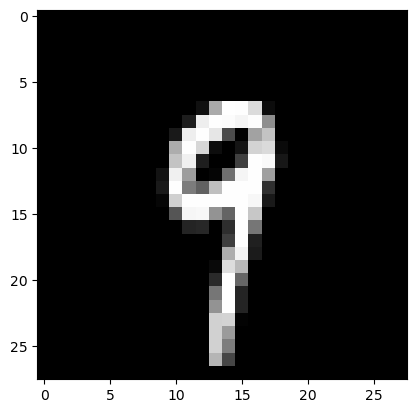

In [166]:
plt.imshow(x_train[600],cmap='gray')
plt.show()

In [169]:
autoencoder = Sequential()
autoencoder.add(Flatten(input_shape=(28,28)))
autoencoder.add(Dropout(0.25))
autoencoder.add(Dense(256,activation='relu'))
autoencoder.add(Dropout(0.25))
autoencoder.add(Dense(128,activation='relu'))
autoencoder.add(Dropout(0.25))
autoencoder.add(Dense(64,activation='relu'))
autoencoder.add(Dropout(0.25))
autoencoder.add(Dense(32,activation='relu'))
autoencoder.add(Dense(64,activation='relu'))
autoencoder.add(Dropout(0.25))
autoencoder.add(Dense(128,activation='relu'))
autoencoder.add(Dropout(0.25))
autoencoder.add(Dense(256,activation='relu'))
autoencoder.add(Dropout(0.25))
autoencoder.add(Dense(784,activation='sigmoid'))
autoencoder.add(Reshape((28,28)))

In [172]:
img = Input(shape=(28,28))
output = autoencoder(img)
auto = Model(inputs=img,outputs=output)

In [173]:
auto.compile(optimizer='adam',loss='binary_crossentropy')

In [179]:
auto.fit(x_train,x_train,epochs=10,validation_data=(x_test,x_test))

### Text Generator

In [34]:
with open ('poems.txt') as f:
    text = f.read()
print(text)    

ï»¿Buffalo Billâ€™s
defunct
who used to
ride a watersmooth-silver
stallion
and break one two three four five pigeons just like that
Jesus

he was a handsome man
and what i want to know is
how do you like your blueeyed boy
Mister Death

Had I the heavenâ€™s embroidered cloths,
Enwrought with golden and silver light,
The blue and the dim and the dark cloths
Of night and light and the half-light,
I would spread the cloths under your feet:
But I, being poor, have only my dreams;
I have spread my dreams under your feet;
Tread softly because you tread on my dreams.

He clasps the crag with crooked hands;
Close to the sun in lonely lands,
Ringâ€™d with the azure world, he stands.

The wrinkled sea beneath him crawls;
He watches from his mountain walls,
And like a thunderbolt he falls.

Some say the world will end in fire,
Some say in ice.
From what Iâ€™ve tasted of desire
I hold with those who favor fire.
But if it had to perish twice,
I think I know enough of hate
To say that for destruction

In [35]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(text)
print("hey There : ",tokenizer.texts_to_sequences('hey There'))
print("hey There : ",tokenizer.texts_to_sequences(['hey There']))

hey There :  [[6], [2], [17], [1], [4], [6], [2], [11], [2]]
hey There :  [[6, 2, 17, 1, 4, 6, 2, 11, 2]]


In [36]:
data = np.array(tokenizer.texts_to_sequences([text]))[0] - 1
data

array([33, 34, 35, ..., 19,  1, 25])

In [37]:
vo_len = len(tokenizer.word_index)
seq_len = 100
data = tf.data.Dataset.from_tensor_slices(data)
data = data.batch(seq_len+1,drop_remainder=True)
data = data.map(lambda x : (x[:-1],x[1:]))
data = data.shuffle(1000).batch(64)


In [ ]:
tok = Sequential()
tok.add(Embedding(vo_len,32))
tok.add(GRU(100,return_sequences=True,dropout=0.1))
tok.add(Dense(vo_len,activation='softmax'))

In [38]:
tok.compile(loss='sparse_categorical_crossentropy',optimizer='adam')
his=tok.fit(data,epochs=1000,verbose=False)

In [44]:
def generator(s):
    dat = np.array(tokenizer.texts_to_sequences([s]))-1
    dat = tok.predict(dat)
    out = np.argmax(dat,axis=-1)+1
    out = tokenizer.sequences_to_texts(out)[0][-1]
    return out

In [45]:
def pred(s,loop=10):
    for _ in range(loop):
        s+=generator(s)
    return s    

In [46]:
print(pred('vanakam da maapla'))

1/1 [==============================] - 0s 24ms/step
vanakam da maaplads and the
